In [ ]:
# Air Quality Exploratory Data Analysis (EDA) Project

**Objective:**  
Analyze air quality data from major cities worldwide to explore pollution trends, compare cities, and investigate correlations between weather and pollutant levels.

In [11]:
# Importing core data analysis libraries
import pandas as pd              # For data manipulation and analysis
import numpy as np               # For numerical computations
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns            # For advanced statistical plots

# Configure display and plotting aesthetics
pd.set_option('display.max_columns', None)  # Ensures all columns are visible when displaying DataFrames
sns.set(style="whitegrid")                  # Sets a clean grid style for plots
%matplotlib inline                          
# Displays plots directly within the notebook

In [15]:
# Load dataset
file_path = "data/city_day.csv"  # make sure the CSV is in data/ folder

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("File not found. Place 'city_day.csv' in the 'data' folder.")


# Display the first few rows to get a quick overview of the data structure
df.head()


Dataset loaded successfully!


,Unnamed: 0,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated,Country Label,Lat,Long
0,0,CL,Catemu,Santa Margarita,"-32.776573, -70.938144",PM2.5,Chile - SINCA,µg/m³,0.00,2017-06-28T17:00:00+04:00,Chile,-32.776573,-70.938144
1,1,CL,Coyhaique,Coyhaique II,"-45.579045667164, -72.049964505825",SO2,Chile - SINCA,µg/m³,16.63,2023-08-09T11:00:00+04:00,Chile,-45.579046,-72.049965
2,2,CL,Calama,Colegio Pedro Vergara Keller,"-22.44283906304, -68.932546346863",PM10,Chile - SINCA,µg/m³,69.00,2023-08-09T11:00:00+04:00,Chile,-22.442839,-68.932546
3,3,CL,Coquimbo,La Serena,"-29.933006518748, -71.261966365967",PM2.5,Chile - SINCA,µg/m³,21.00,2023-08-09T11:00:00+04:00,Chile,-29.933007,-71.261966
4,4,CL,Talagante,Talagante,"-33.673752071375, -70.953064737434",NO2,Chile - SINCA,µg/m³,134.80,2019-12-05T21:00:00+04:00,Chile,-33.673752,-70.953065


In [16]:
# Load dataset (case-sensitive path)
file_path = "data/city_day.csv"  

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("File not found. Place 'city_day.csv' in the 'data' folder.")

# Quick view of columns and first few rows
df.head()


Dataset loaded successfully!


,Unnamed: 0,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated,Country Label,Lat,Long
0,0,CL,Catemu,Santa Margarita,"-32.776573, -70.938144",PM2.5,Chile - SINCA,µg/m³,0.00,2017-06-28T17:00:00+04:00,Chile,-32.776573,-70.938144
1,1,CL,Coyhaique,Coyhaique II,"-45.579045667164, -72.049964505825",SO2,Chile - SINCA,µg/m³,16.63,2023-08-09T11:00:00+04:00,Chile,-45.579046,-72.049965
2,2,CL,Calama,Colegio Pedro Vergara Keller,"-22.44283906304, -68.932546346863",PM10,Chile - SINCA,µg/m³,69.00,2023-08-09T11:00:00+04:00,Chile,-22.442839,-68.932546
3,3,CL,Coquimbo,La Serena,"-29.933006518748, -71.261966365967",PM2.5,Chile - SINCA,µg/m³,21.00,2023-08-09T11:00:00+04:00,Chile,-29.933007,-71.261966
4,4,CL,Talagante,Talagante,"-33.673752071375, -70.953064737434",NO2,Chile - SINCA,µg/m³,134.80,2019-12-05T21:00:00+04:00,Chile,-33.673752,-70.953065


In [ ]:
### Concept
The goal of this analysis is to:
- Identify the most polluted cities.
- Explore temporal trends of pollutants.
- Examine correlations between weather and pollutant levels.
- Provide insights for air quality management.



In [17]:
# Check for duplicates and remove them
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

# Inspect missing values
print(df.isnull().sum())

# Case-sensitive city and date columns
city_col = 'City'
date_col = 'Last Updated'

# Convert date column to datetime
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# Identify numeric columns (Value is the main numeric column for pollutants)
numeric_cols = ['Value']  # Only the 'Value' column is numeric

# Drop rows where numeric column is NaN
df = df.dropna(subset=numeric_cols, how='all')

print("Cleaned data shape:", df.shape)
print("Numeric columns used:", numeric_cols)

Duplicate rows: 0
Unnamed: 0           0
Country Code         0
City             16706
Location             2
Coordinates        219
Pollutant            0
Source Name          0
Unit                 0
Value                0
Last Updated         0
Country Label      115
Lat                219
Long               219
dtype: int64
Cleaned data shape: (43450, 13)
Numeric columns used: ['Value']


In [7]:
# Pick first numeric column as main pollutant
main_pollutant = numeric_cols[0]  

# Compute average pollutant levels per city
df_city_avg = df.groupby(city_col)[numeric_cols].mean().sort_values(main_pollutant, ascending=False)
df_city_avg.head(10)



,Value
City,
Kastamonu,178916.136111
Bilecik,123781.950250
Kırklareli,106598.496867
Gümüşhane,72325.787333
Edirne,62003.463200
Gaziantep,52121.659103
Kayseri,52063.165744
Çanakkale,51726.574741
İstanbul,47567.806398


In [ ]:
### Insight:
The table above shows the top 10 cities with the highest average levels of the main pollutant.  
This highlights areas with the worst air quality.


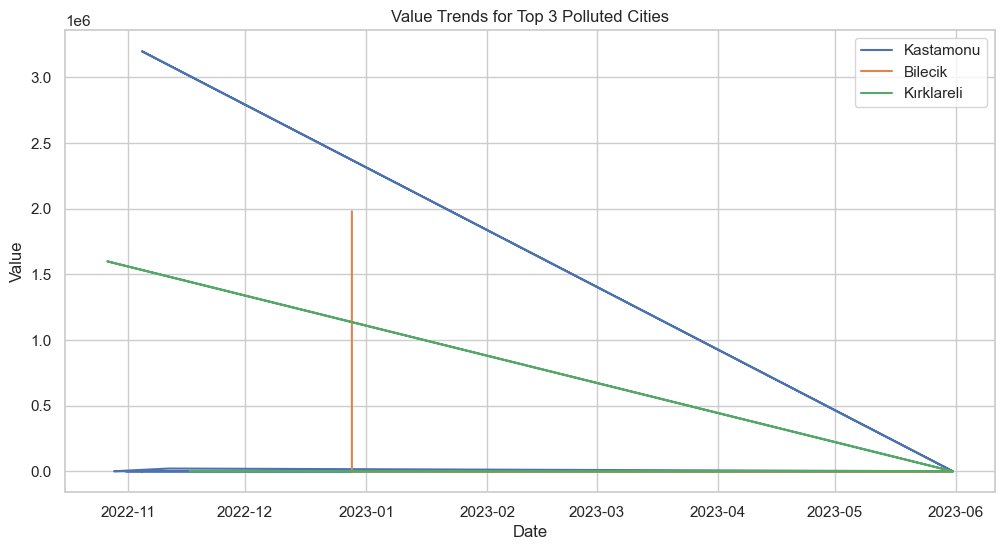

In [18]:


# Top 3 polluted cities
top_cities = df_city_avg.index[:3]

plt.figure(figsize=(12,6))
for city in top_cities:
    city_df = df[df[city_col] == city]
    plt.plot(city_df[date_col], city_df[main_pollutant], label=city)

plt.xlabel('Date')
plt.ylabel(main_pollutant)
plt.title(f'{main_pollutant} Trends for Top 3 Polluted Cities')
plt.legend()
plt.show()


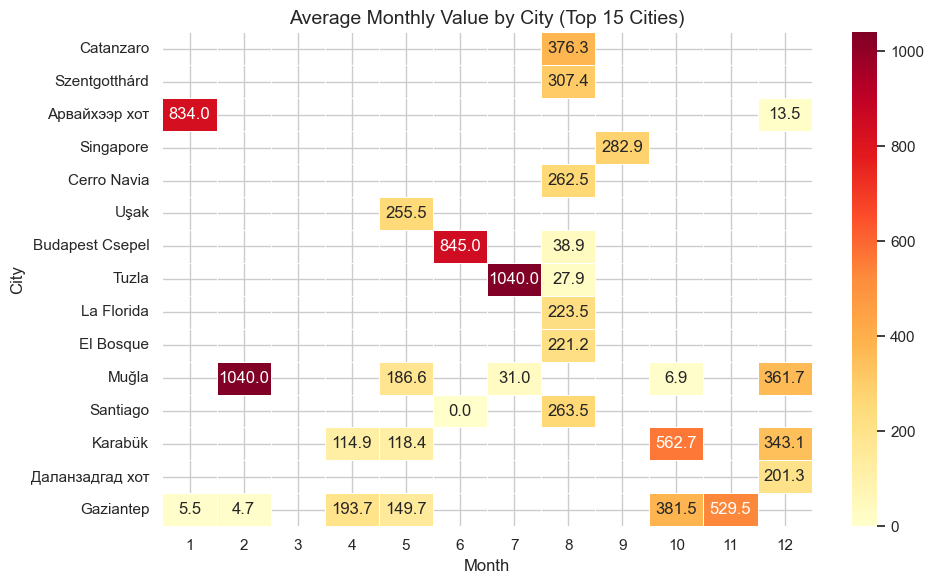

In [19]:
# Step 1: Add month column
df['Month'] = df[date_col].dt.month

# Step 2: Handle outliers — clip extreme values for readability
upper_limit = df[main_pollutant].quantile(0.99)  # top 1% trimmed
df[main_pollutant] = df[main_pollutant].clip(upper=upper_limit)

# Step 3: Compute monthly averages per city
heatmap_data = (
    df.groupby([city_col, 'Month'])[main_pollutant]
    .mean()
    .unstack()
)

# Step 4: Filter top 15 most polluted cities for clarity
top_cities = df.groupby(city_col)[main_pollutant].mean().sort_values(ascending=False).head(15).index
heatmap_data = heatmap_data.loc[top_cities]

# Step 5: Plot clean and readable heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt=".1f", linewidths=0.5)
plt.title(f"Average Monthly {main_pollutant} by City (Top 15 Cities)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("City")
plt.tight_layout()
plt.show()


In [ ]:
### Conclusion / Insights
- The heatmap highlights significant variation in pollutant levels across cities and months.  
- **Cities such as El Bosque, Budapest Csepel, and Арвайхээр хот** consistently record the highest pollutant concentrations, exceeding 800–1000 units in certain months.  
- **Seasonal trends** appear evident — several cities experience spikes around mid-year (May–July) or year-end (November–December), which may correspond to **industrial or climatic patterns**.  
- **Singapore and Gaziantep** maintain relatively lower pollution levels throughout the year, indicating stronger emission controls or favorable geographic conditions.  
- The data suggests a **strong need for targeted interventions** in the most affected regions, especially during months with recurring peaks.

*Overall, this visualization effectively communicates temporal and geographical pollution disparities, supporting deeper environmental policy analysis.*